In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


In [ ]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.shape

(30000, 25)

In [ ]:
print(data.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

#### Handle Missing Values


In [ ]:
print(data.isnull().sum())


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


No missing values found

In [ ]:
data.duplicated().sum()

0

No duplicates row found

# Univariate Analysis

## Numerical Data:


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#renaming for better convinience
data.rename(columns={'default.payment.next.month': 'IsDefaulter'}, inplace=True)

In [ ]:
# Get numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Get categorical columns
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']


print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'IsDefaulter']
Categorical columns: ['SEX', 'EDUCATION', 'MARRIAGE']


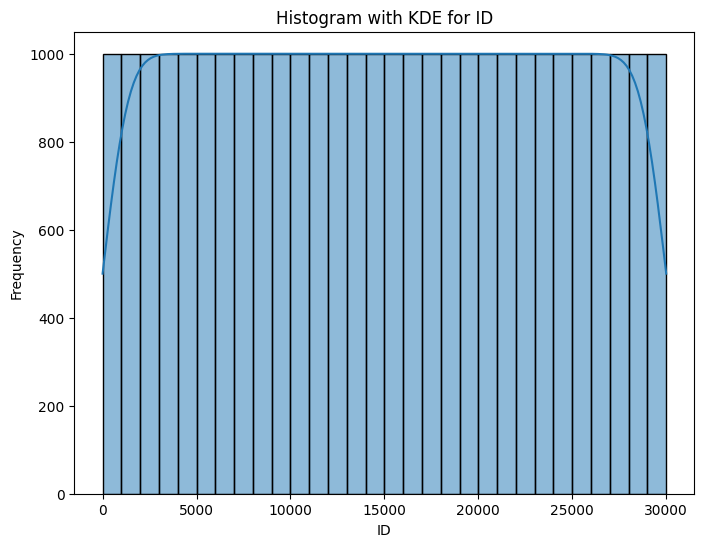

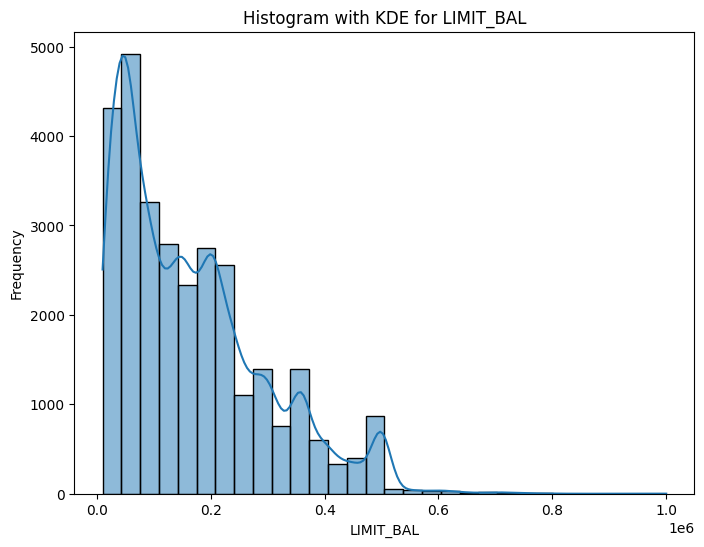

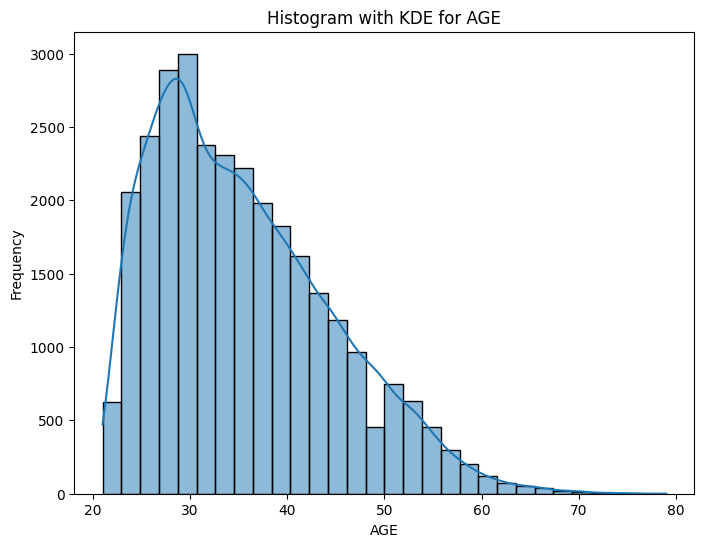

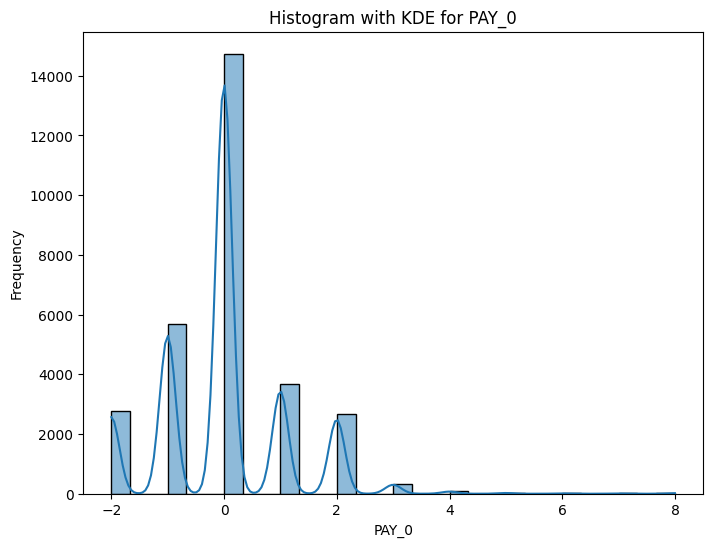

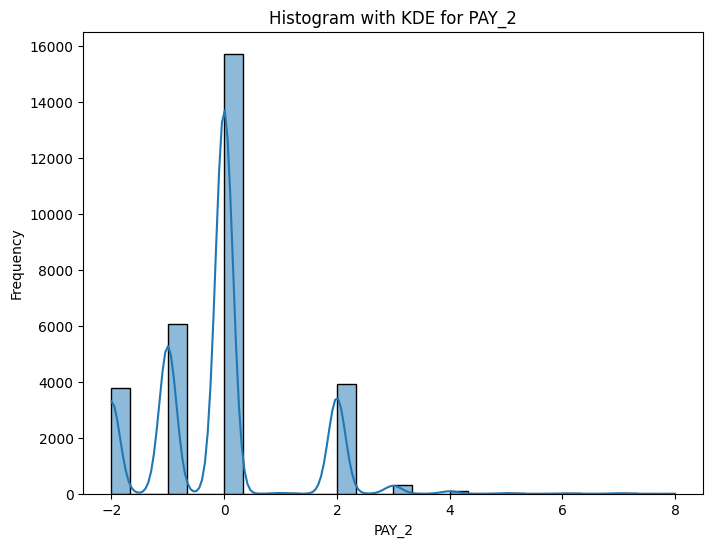

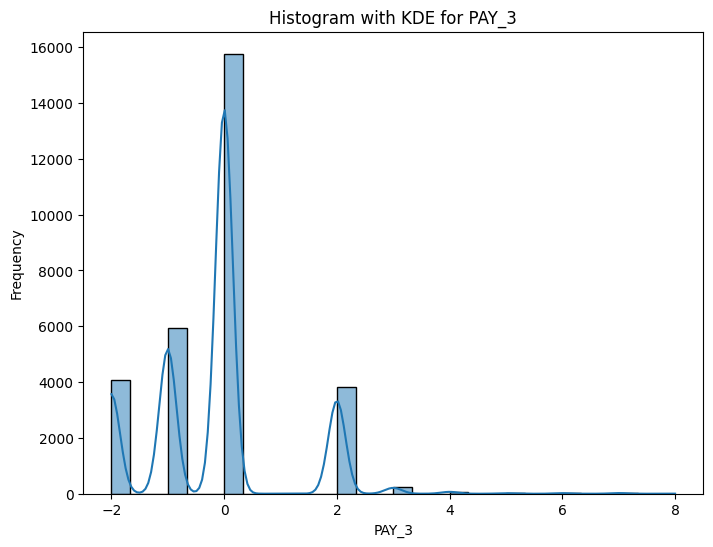

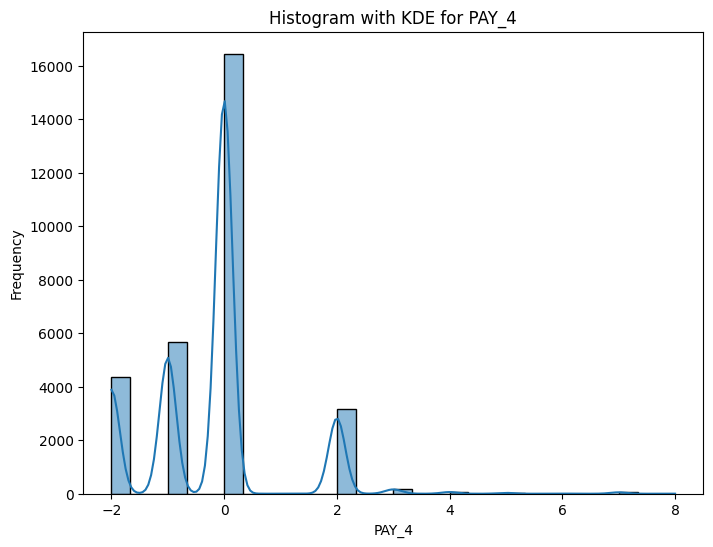

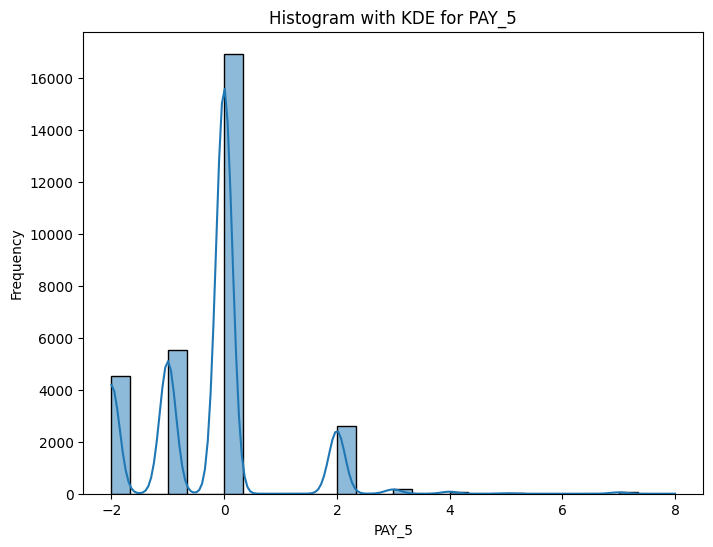

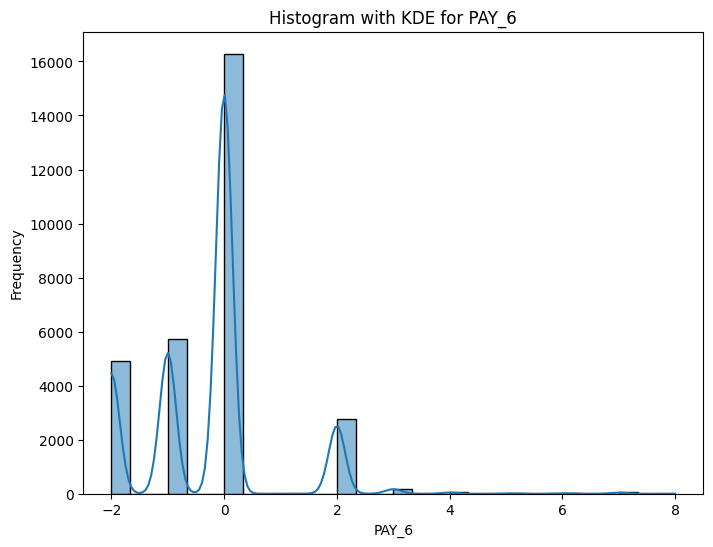

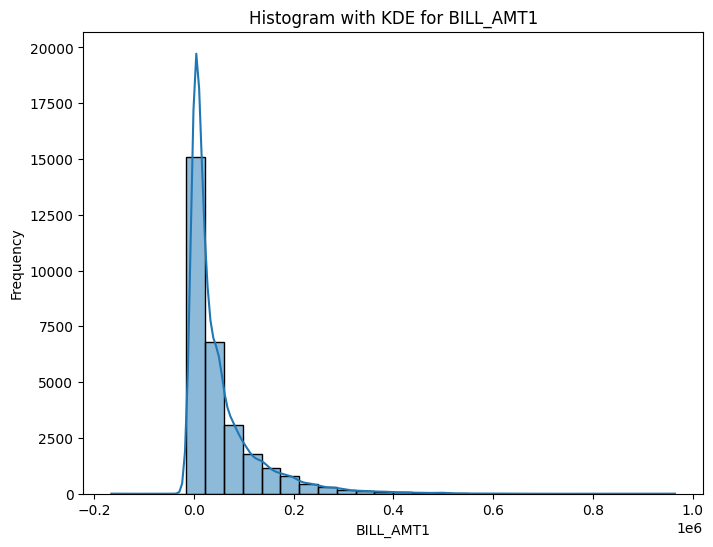

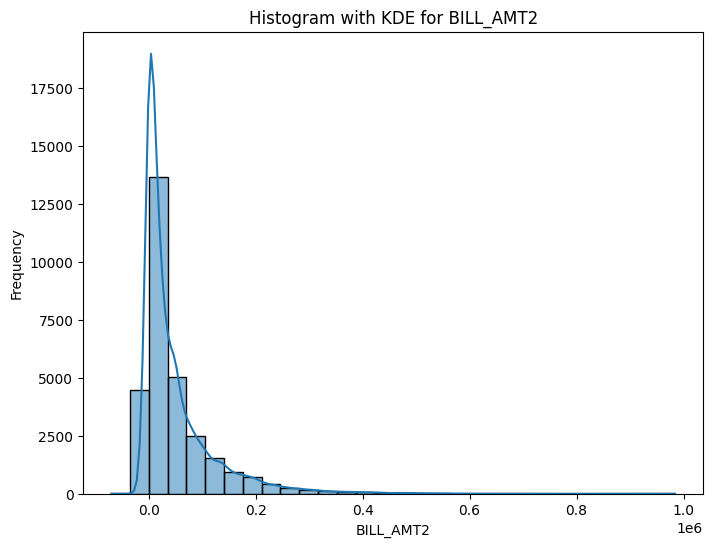

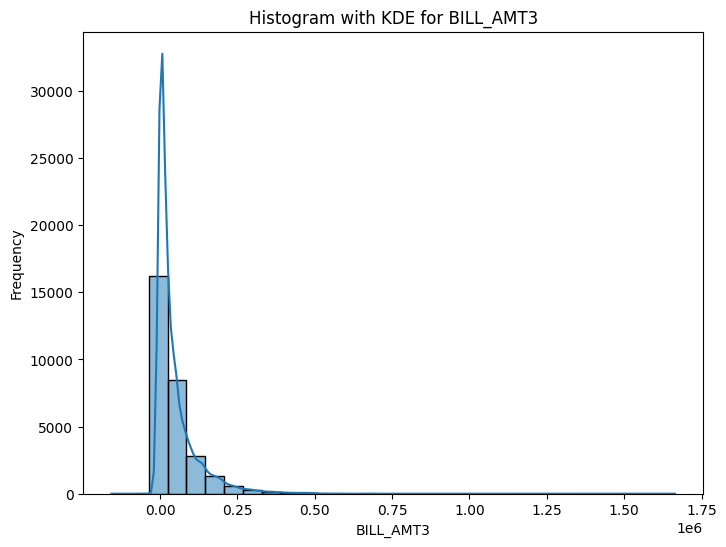

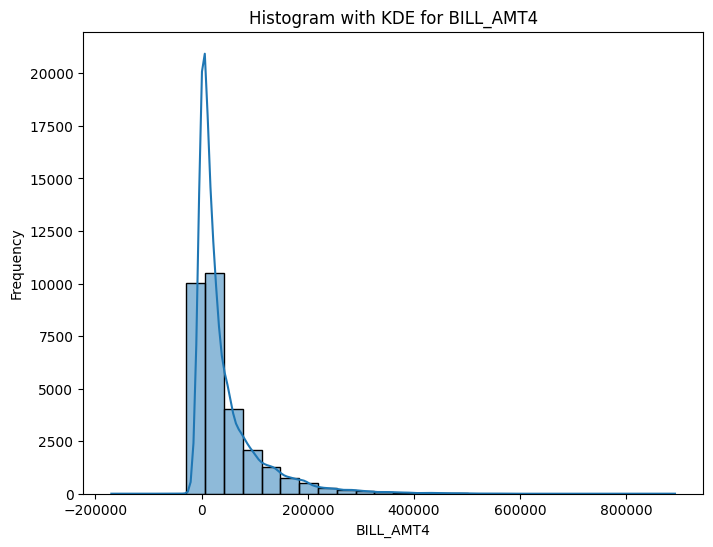

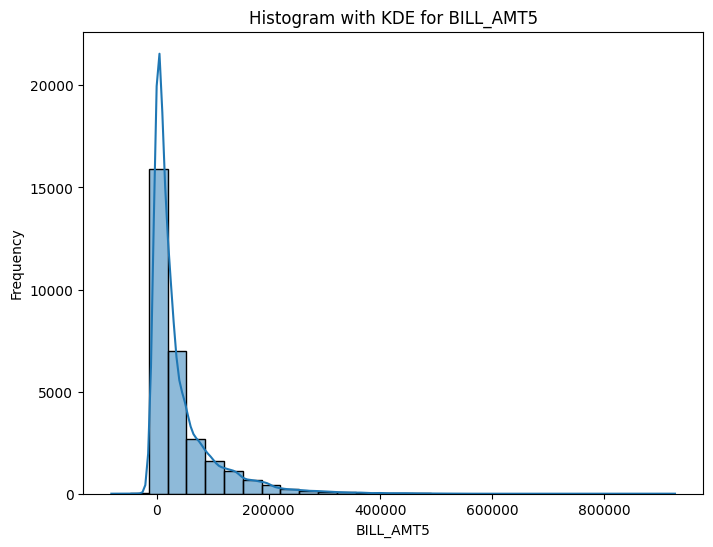

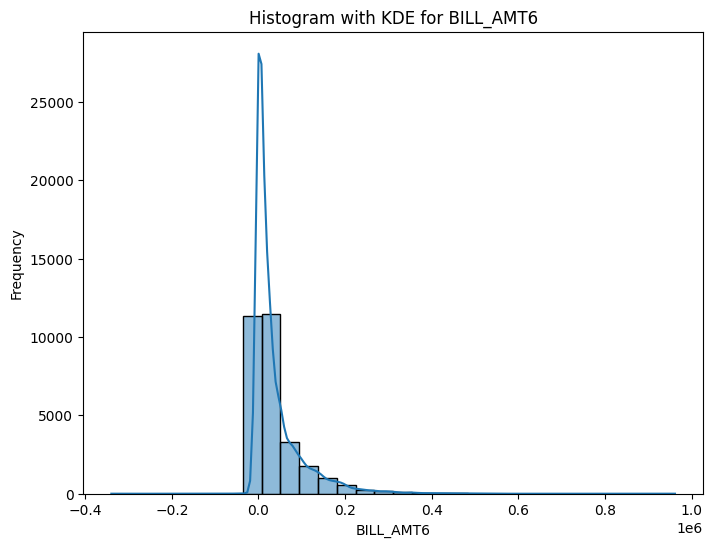

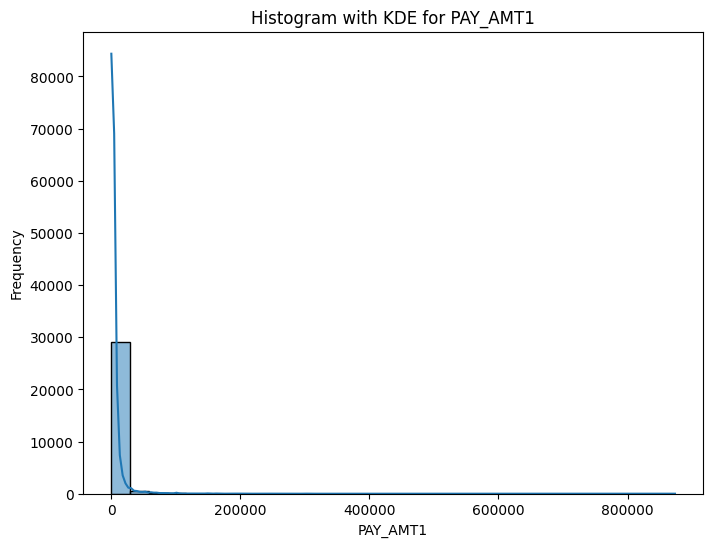

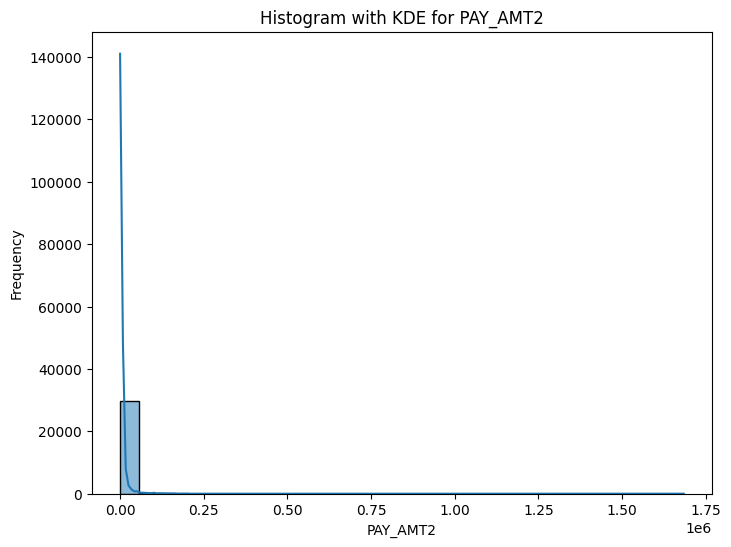

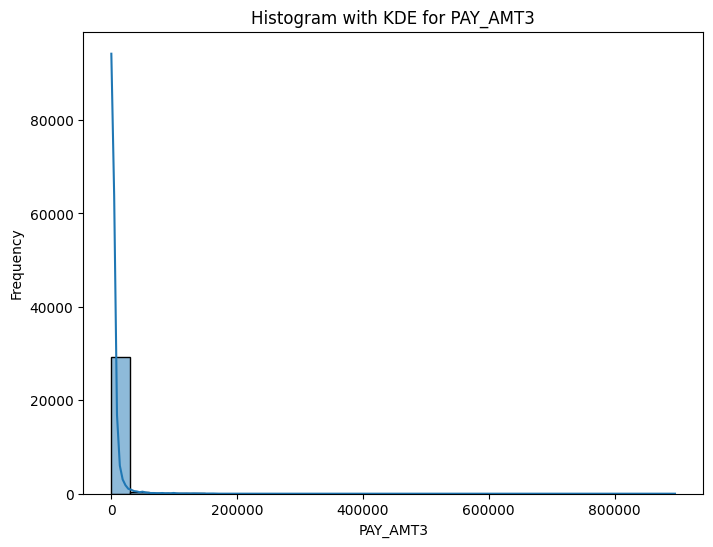

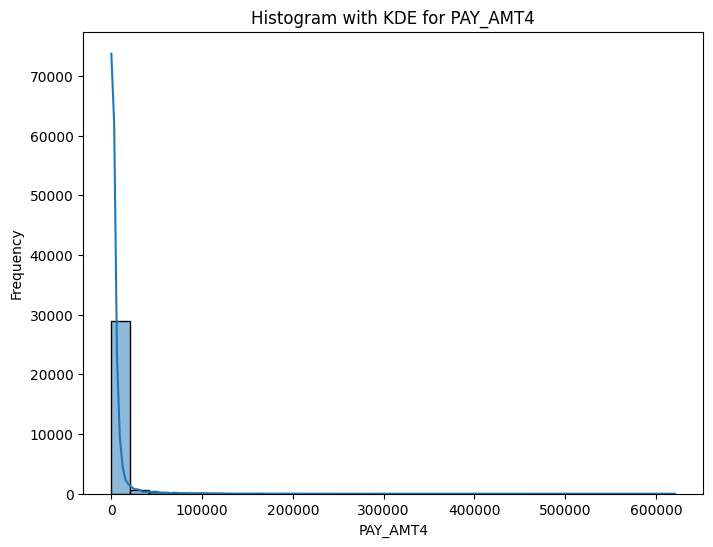

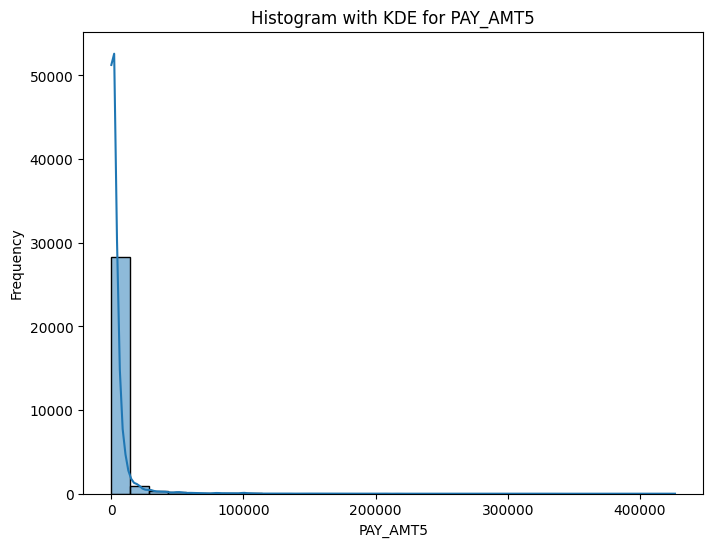

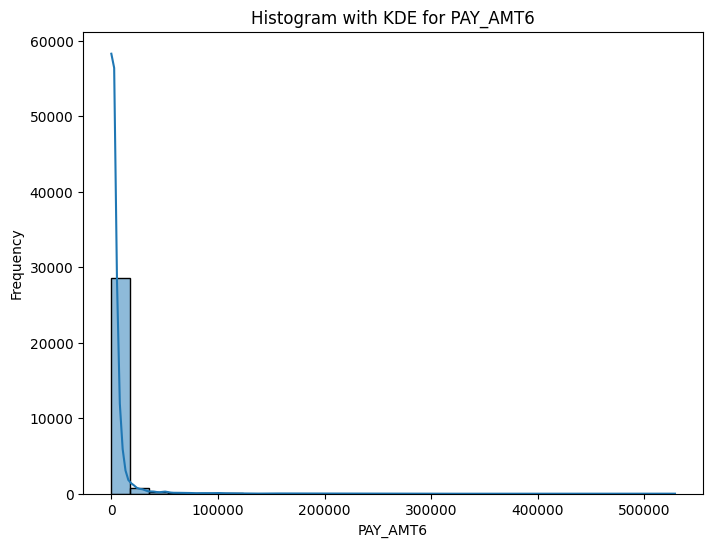

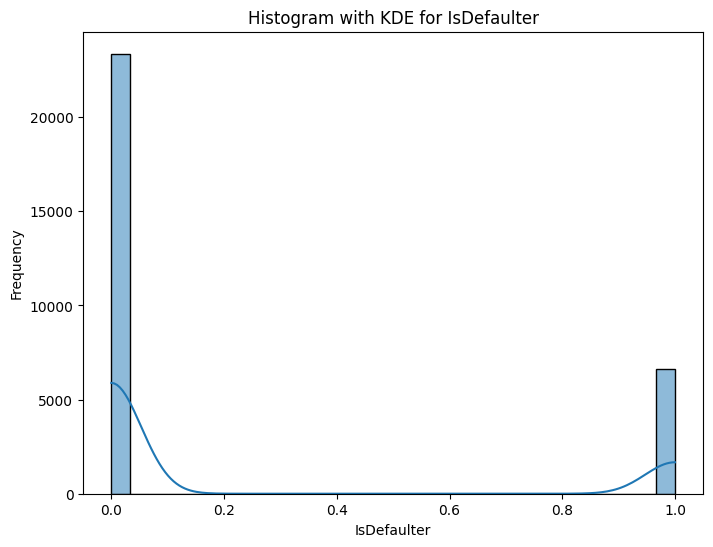

In [ ]:
# Loop through numerical columns and create separate histograms with KDE
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins = 30, kde=True)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Categorical Data:


In [ ]:
data['SEX'].value_counts()


,count
SEX,
FEMALE,18112
MALE,11888


In [ ]:
data['EDUCATION'].value_counts()


,count
EDUCATION,
university,14030
graduate school,10585
high school,4917
5,280
others,123
6,51
0,14


As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.



In [ ]:
fil = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[fil, 'EDUCATION'] = "others"
data['EDUCATION'].value_counts()

,count
EDUCATION,
university,14030
graduate school,10585
high school,4917
others,468


In [ ]:
data['MARRIAGE'].value_counts()


,count
MARRIAGE,
single,15964
married,13659
others,323
0,54


We have few values for 0, which are not determined . So I am adding them in Others category.



In [ ]:
fil = data['MARRIAGE'] == 0
data.loc[fil, 'MARRIAGE'] = "others"
data['MARRIAGE'].value_counts()

,count
MARRIAGE,
single,15964
married,13659
others,377


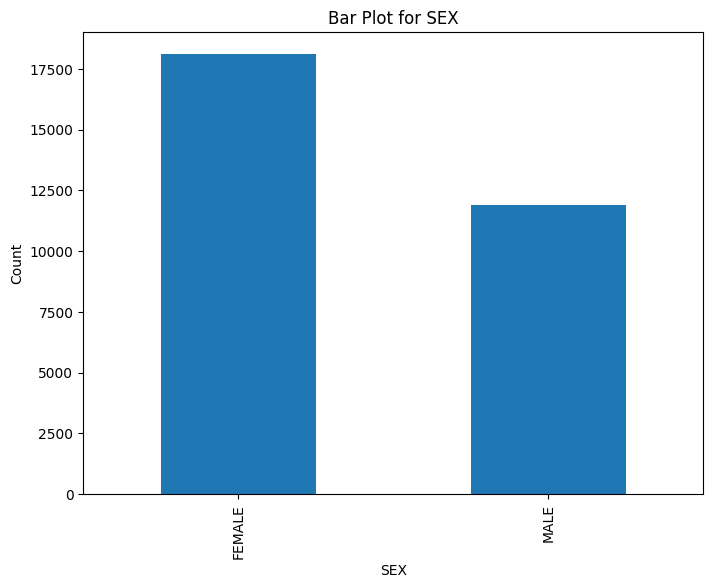

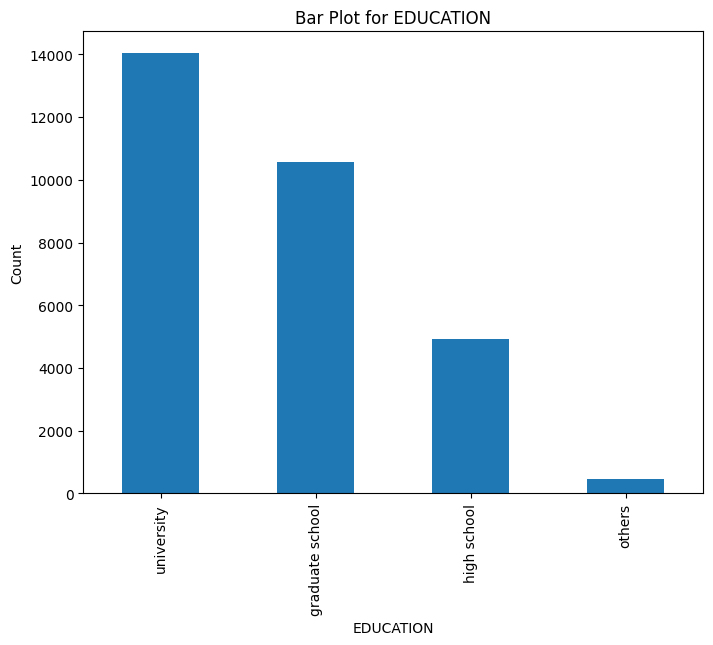

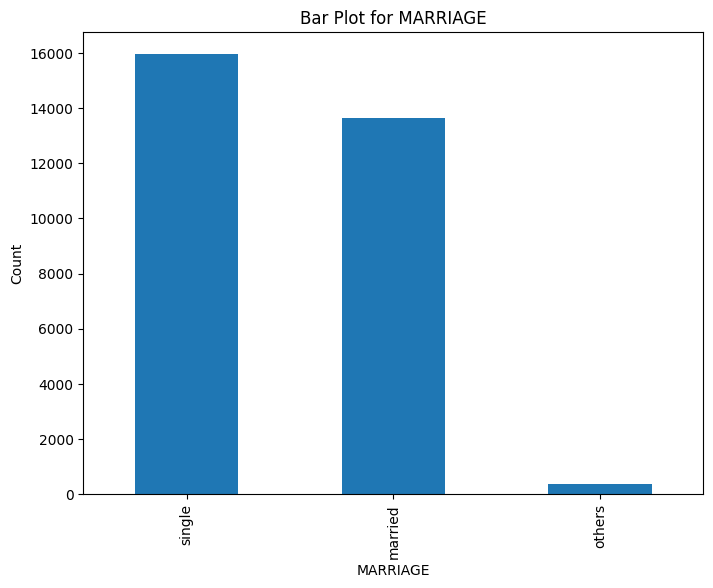

In [ ]:
# Loop through each categorical column and create a bar plot
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## OBSERVATIONS:

1. Most people who have taken loans are in the age range of 25 to 30.
2. More than 20,000 customers have defaulted their payment
3. Dataset contains more Females than male
4. Dataset has more university graduates compared to other education
5. The dataset contains more number of singles than people who are married.


# Bivariate Analysis

<Figure size 1000x500 with 0 Axes>

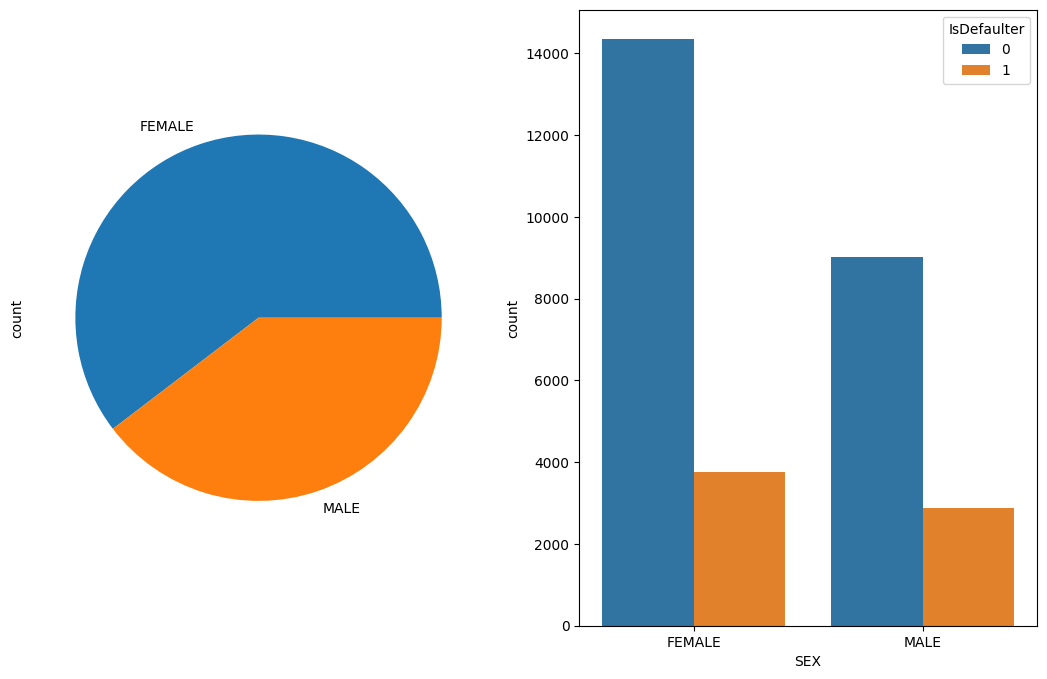

<Figure size 1000x500 with 0 Axes>

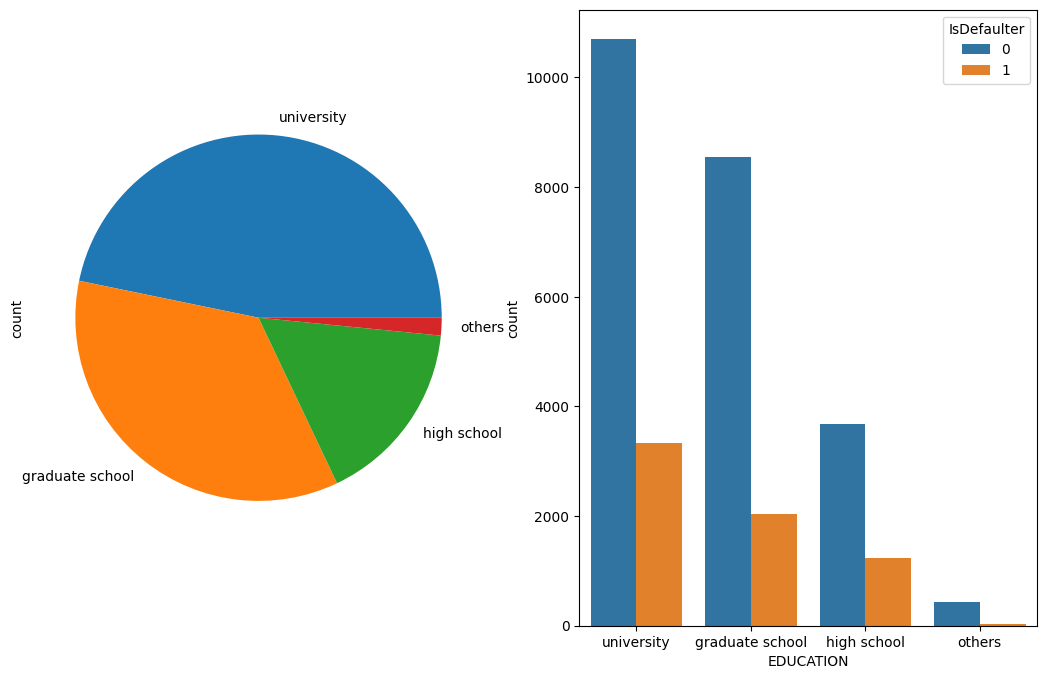

<Figure size 1000x500 with 0 Axes>

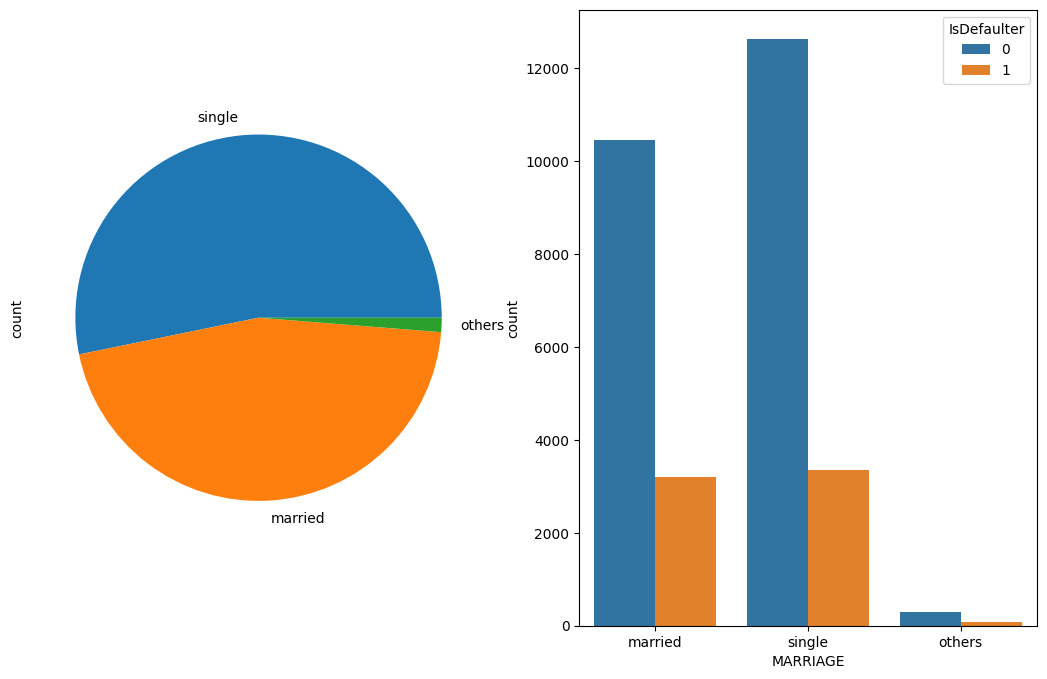

In [ ]:
for col in categorical_cols:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  data[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = data["IsDefaulter"] , data = data[categorical_cols])

OBSERVATIONS:

1. The majority of credit card holders are female, resulting in a higher proportion of female defaulters.
2. Defaulters include a higher proportion of educated individuals (those who attended graduate school or university).
3. A higher proportion of defaulters are single.

"However, no definitive conclusions can be drawn from these observations because the dataset predominantly consists of these groups."

# Feature Engineering and Preprocessing


In [ ]:
data.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
#drop ID column
data.drop('ID', axis=1, inplace=True)

In [ ]:

# 1. One-Hot Encoding (for MARRIAGE)
one_hot = pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE')
data = pd.concat([data, one_hot], axis=1)
data.drop('MARRIAGE', axis=1, inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000.0,FEMALE,university,24,2,2,-1,-1,-2,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,True,False,False
1,120000.0,FEMALE,university,26,-1,2,0,0,0,2,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,False,False,True
2,90000.0,FEMALE,university,34,0,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,False,False,True
3,50000.0,FEMALE,university,37,0,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,True,False,False
4,50000.0,MALE,university,57,-1,0,-1,0,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,True,False,False


In [ ]:
# 2. Label Encoding (for SEX)
le = LabelEncoder()
data['SEX'] = le.fit_transform(data['SEX'])

print("\nAfter Label Encoding SEX:")
data.head()


After Label Encoding SEX:


,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000.0,0,university,24,2,2,-1,-1,-2,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,True,False,False
1,120000.0,0,university,26,-1,2,0,0,0,2,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,False,False,True
2,90000.0,0,university,34,0,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,False,False,True
3,50000.0,0,university,37,0,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,True,False,False
4,50000.0,1,university,57,-1,0,-1,0,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,True,False,False


In [ ]:
# 3. Ordinal Encoding (for EDUCATION)
education_order = ['others', 'high school', 'graduate school', 'university']
oe = OrdinalEncoder(categories=[education_order])
data['EDUCATION'] = oe.fit_transform(data[['EDUCATION']])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         30000 non-null  float64
 1   SEX               30000 non-null  int64  
 2   EDUCATION         30000 non-null  float64
 3   AGE               30000 non-null  int64  
 4   PAY_0             30000 non-null  int64  
 5   PAY_2             30000 non-null  int64  
 6   PAY_3             30000 non-null  int64  
 7   PAY_4             30000 non-null  int64  
 8   PAY_5             30000 non-null  int64  
 9   PAY_6             30000 non-null  int64  
 10  BILL_AMT1         30000 non-null  float64
 11  BILL_AMT2         30000 non-null  float64
 12  BILL_AMT3         30000 non-null  float64
 13  BILL_AMT4         30000 non-null  float64
 14  BILL_AMT5         30000 non-null  float64
 15  BILL_AMT6         30000 non-null  float64
 16  PAY_AMT1          30000 non-null  float6

# Data splitting

In [ ]:
X = data.drop('IsDefaulter', axis=1)
y = data['IsDefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Data rebalancing with SMOTE

Since we have identified that our dataset is imbalanced, we are using SMOTE (Synthetic Minority Oversampling Technique) to address this issue.

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Feature Scaling

In [ ]:
# 1. StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train_resampled)
X_test_standard = scaler.transform(X_test)

## Model building and testing

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_standard,y_train_resampled)

GaussianNB()

In [ ]:
y_pred=clf.predict(X_test_standard)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

39.84444444444444

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import time


# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extreme Gradient Boosting": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Start timer
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # End timer
    end_time = time.time()

    # Calculate training time
    train_time = end_time - start_time

    return accuracy, cv_scores.mean(), train_time

# Evaluate each classifier
results = []

for name, clf in classifiers.items():
    accuracy, cv_score, train_time = evaluate_model(clf, X_train_standard, y_train_resampled, X_test_standard, y_test)
    results.append((name, accuracy, cv_score, train_time))

# Sort results by accuracy
results.sort(key=lambda x: x[1], reverse=True)

# Print results
print("Classifier Performance Comparison:")
print("-----------------------------------")
for name, accuracy, cv_score, train_time in results:
    print(f"{name}:")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Cross-Validation Score: {cv_score:.4f}")
    print(f"  Training Time: {train_time:.4f} seconds")
    print("-----------------------------------")

# Get the best performing model
best_model_name = results[0][0]
best_model = classifiers[best_model_name]

# Train the best model
best_model.fit(X_train_standard, y_train_resampled)

# Make predictions
y_pred = best_model.predict(X_test_standard)

# Print detailed classification report for the best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred))

feature_names = data.drop(columns=['IsDefaulter']).columns.tolist()

# Feature importance for tree-based models
if best_model_name in ["Decision Tree", "Random Forest", "Gradient Boosting","Extreme Gradient Boosting"]:
    importances = best_model.feature_importances_
    feature_importances = list(zip(feature_names, importances))
    feature_importances.sort(key=lambda x: x[1], reverse=True)

    print(f"\nTop 10 Feature Importances for {best_model_name}:")
    for i, (feature, importance) in enumerate(feature_importances[:10], 1):
        print(f"{i}. {feature}: {importance*100:.2f}%")

Classifier Performance Comparison:
-----------------------------------
Gradient Boosting:
  Test Accuracy: 0.8137
  Cross-Validation Score: 0.8340
  Training Time: 109.0320 seconds
-----------------------------------
SVM:
  Test Accuracy: 0.8033
  Cross-Validation Score: 0.7825
  Training Time: 229.8494 seconds
-----------------------------------
Extreme Gradient Boosting:
  Test Accuracy: 0.8029
  Cross-Validation Score: 0.8428
  Training Time: 4.8575 seconds
-----------------------------------
Random Forest:
  Test Accuracy: 0.8017
  Cross-Validation Score: 0.8633
  Training Time: 65.9421 seconds
-----------------------------------
Logistic Regression:
  Test Accuracy: 0.7943
  Cross-Validation Score: 0.7666
  Training Time: 0.7709 seconds
-----------------------------------
Neural Network:
  Test Accuracy: 0.7737
  Cross-Validation Score: 0.8060
  Training Time: 371.6048 seconds
-----------------------------------
K-Nearest Neighbors:
  Test Accuracy: 0.7358
  Cross-Validation Score

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'learning_rate': 0.03654775061557585, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 848, 'subsample': 0.7085396127095583}
Best cross-validation score: 0.83

Best Model Performance on Test Set:
Accuracy: 0.8026666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7040
           1       0.57      0.39      0.46      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.65      0.67      9000
weighted avg       0.78      0.80      0.79      9000


Top 10 Most Important Features:
EDUCATION: 0.1189
MARRIAGE_single: 0.0935
PAY_0: 0.0828
PAY_2: 0.0618
MARRIAGE_married: 0.0567
BILL_AMT1: 0.0434
PAY_AMT1: 0.0427
PAY_3: 0.0403
LIMIT_BAL: 0.0399
PAY_AMT2: 0.0377


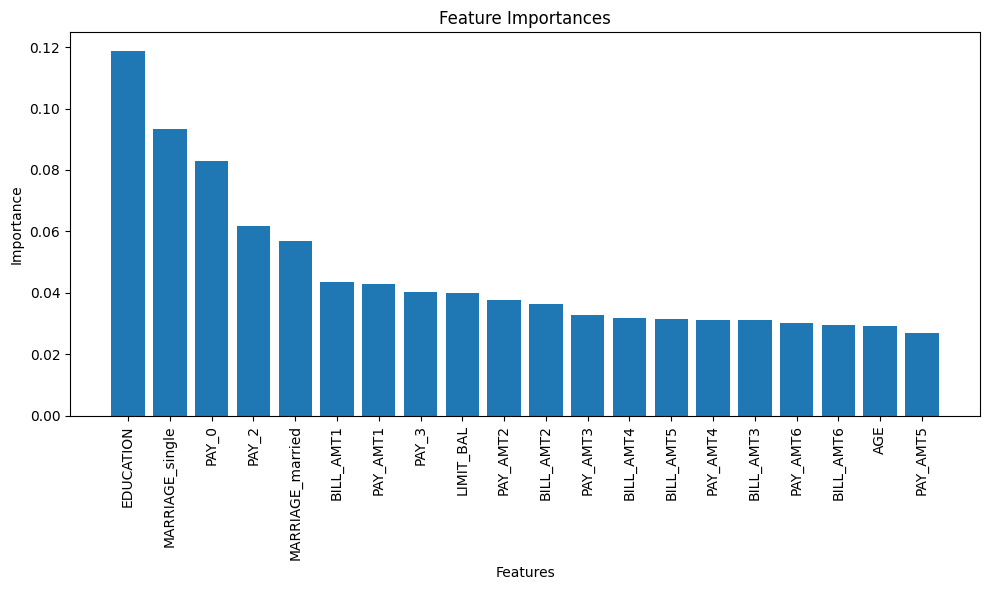

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform


# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', None]
}

# Create a base model
gb_base = GradientBoostingClassifier(random_state=42)

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=gb_base, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train_standard, y_train_resampled)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Get the best model
best_gb = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_gb.predict(X_test_standard)

# Print the model's performance
print("\nBest Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = best_gb.feature_importances_
feature_names = X.columns
feature_importance_sorted = sorted(zip(feature_importance, feature_names), reverse=True)

print("\nTop 10 Most Important Features:")
for importance, name in feature_importance_sorted[:10]:
    print(f"{name}: {importance:.4f}")

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importances = importances.sort_values('importance', ascending=False).head(20)
plt.bar(importances['feature'], importances['importance'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Building model with best parameters

In [49]:
model = GradientBoostingClassifier(
    learning_rate=0.03654775061557585,
    max_depth=9,
    max_features='sqrt',
    min_samples_leaf=8,
    min_samples_split=17,
    n_estimators=848,
    subsample=0.7085396127095583,
    random_state=42  # for reproducibility
)

In [50]:
model.fit(X_train_standard, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.03654775061557585, max_depth=9,
                           max_features='sqrt', min_samples_leaf=8,
                           min_samples_split=17, n_estimators=848,
                           random_state=42, subsample=0.7085396127095583)

In [52]:

# Make predictions using the best model
y_pred = best_gb.predict(X_test_standard)

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8026666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7040
           1       0.57      0.39      0.46      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.65      0.67      9000
weighted avg       0.78      0.80      0.79      9000



Observation:- Based on the observed accuracies, we can conclude that the GradientBoostingClassifier, when used with its default parameters, is outperforming the model obtained through RandomizedSearchCV.

Accuracy: 0.8137
Precision: 0.7971
Recall: 0.8137
F1 Score: 0.8005


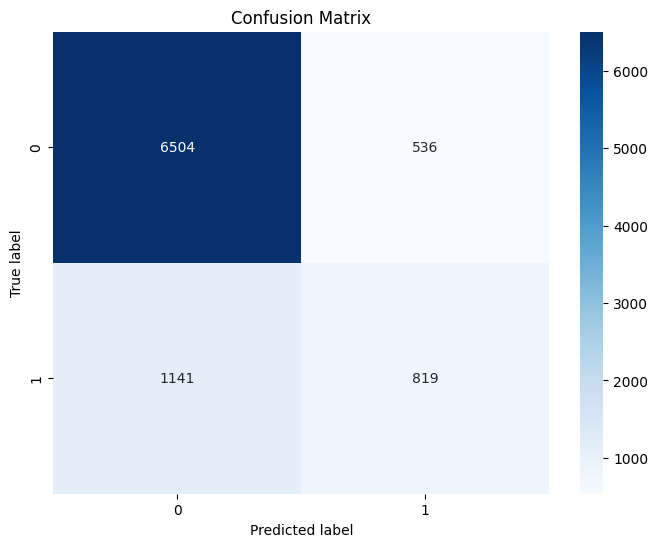

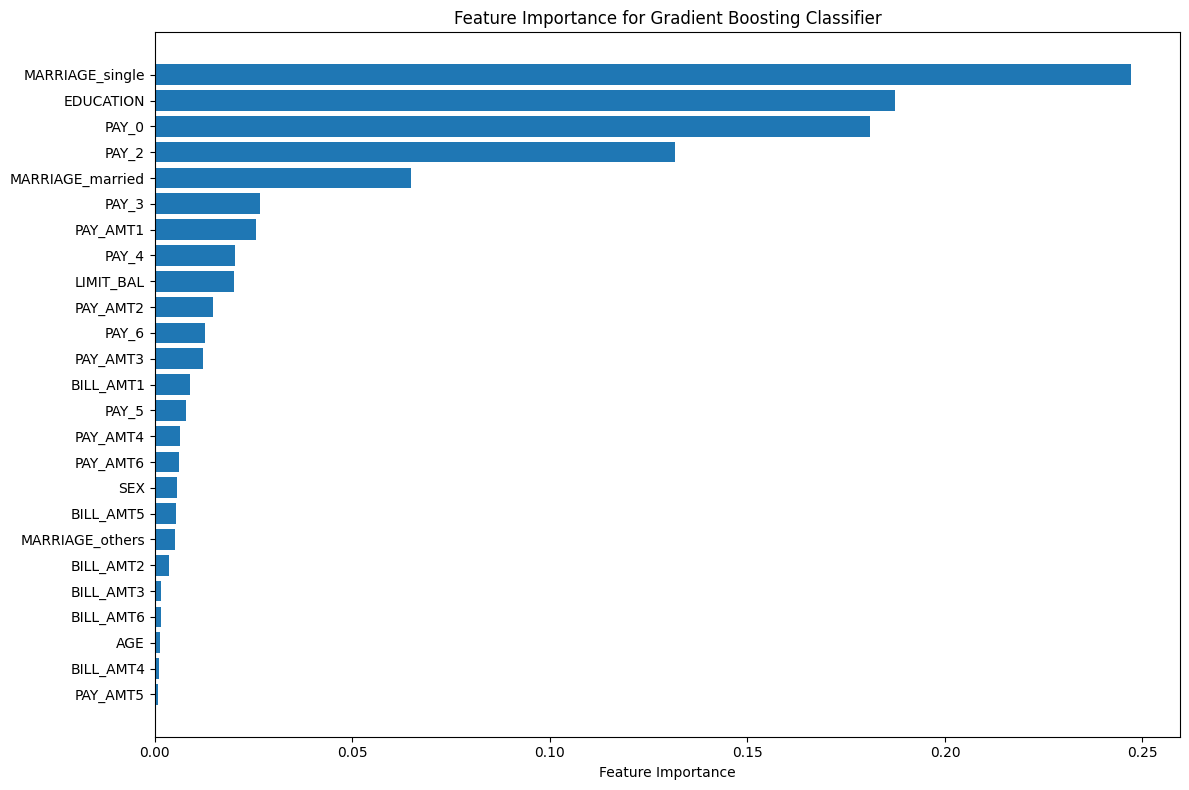

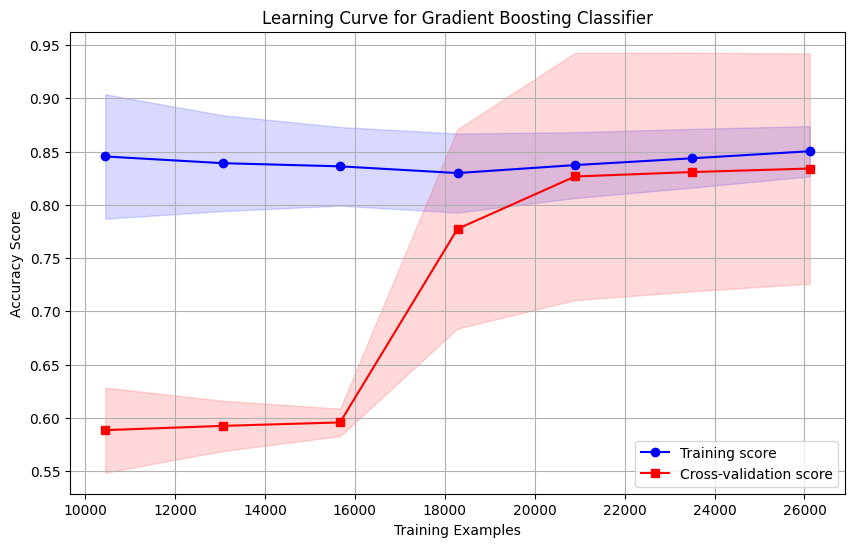

In [59]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Fetch the column names from the data

feature_names = X.columns


# Create the GradientBoostingClassifier with specified hyperparameters
gb_classifier = GradientBoostingClassifier(
        random_state=42
)

# Fit the model
gb_classifier.fit(X_train_standard, y_train_resampled)

# Make predictions
y_pred = gb_classifier.predict(X_test_standard)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Feature importance
feature_importance = gb_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    gb_classifier, X_train_standard, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red", marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color="red")
plt.title("Learning Curve for Gradient Boosting Classifier")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [62]:
import pickle

with open('Default of Credit Card Clients.pkl', 'wb') as file:
    pickle.dump(gb_classifier, file)

In [64]:
import pickle

with open('Default of Credit Card Clients.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [65]:
loaded_model

GradientBoostingClassifier(random_state=42)